In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import Audio

In [2]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
from path import Path as path

In [4]:
PATH = path("data/planet")

In [5]:
PATH.files()

[Path('data/planet/test_v2_file_mapping.csv'),
 Path('data/planet/train_v2.csv')]

In [6]:
PATH.dirs()

[Path('data/planet/train-jpg'),
 Path('data/planet/test-jpg-additional'),
 Path('data/planet/models'),
 Path('data/planet/test-jpg'),
 Path('data/planet/tmp')]

In [7]:
from planet import f2

metrics=[f2]
f_model = resnet34

In [8]:
label_csv = PATH + "/train_v2.csv"
labels = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(labels)

In [9]:
def get_data(sz, myzoom = 1.05, mytransform = transforms_top_down):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=myzoom)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms,
                                       suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [10]:
data = get_data(256)

In [11]:
x,y = next(iter(data.val_dl))

In [12]:
data.classes

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [13]:
y[0]


 1
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 1
 0
 0
 0
 1
[torch.cuda.FloatTensor of size 17 (GPU 0)]

In [14]:
len(y[0])

17

In [15]:
len(data.classes)

17

In [16]:
list(zip(data.classes, y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

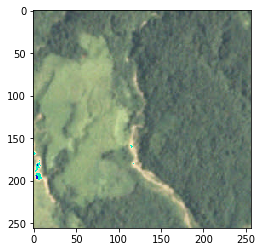

In [17]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.7)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.221932   0.274582   0.811943  



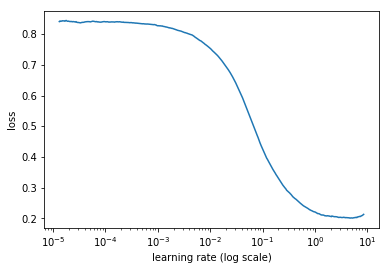

In [26]:
#Setting Parameters:
sz = 64
resize = 1.25
zoom = 1.05
data = get_data(sz, myzoom = zoom)
data = data.resize(int(sz*resize), 'tmp')
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)
lrf = learn.lr_find()
learn.sched.plot()
Audio(url="CHORD.WAV", autoplay=True)

In [28]:
def learn_round1(learner, rate):
    learner.freeze()
    learner.fit(rate, 3, cycle_len=1, cycle_mult=2)
    Audio(url="CHORD.WAV", autoplay=True)

In [29]:
def learn_round2(learner, rates):
    learner.unfreeze()
    learner.fit(rates, 3, cycle_len=1, cycle_mult=2)
    Audio(url="CHORD.WAV", autoplay=True)

In [30]:
lr = 1.0/3

In [31]:
learn_round1(learn, lr)
Audio(url="CHORD.WAV", autoplay=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.144688   0.131863   0.884902  
    1      0.138196   0.128477   0.888268                    
    2      0.133585   0.126304   0.889892                    
    3      0.134952   0.126083   0.889514                    
    4      0.133909   0.123358   0.892372                    
    5      0.130879   0.122473   0.893012                    
    6      0.132224   0.121895   0.893851                    



In [32]:
lrs = np.array([lr/9, lr/3, lr])

In [33]:
learn_round2(learn, lrs)
Audio(url="CHORD.WAV", autoplay=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                          
    0      0.119334   0.110805   0.907098  
    1      0.115004   0.108605   0.907177                    
    2      0.107481   0.102351   0.913407                    
    3      0.111738   0.107163   0.911786                    
    4      0.107368   0.101035   0.915479                    
    5      0.099979   0.098652   0.917667                     
    6      0.097859   0.097625   0.917933                     



In [34]:
sz = 128
learn.set_data(get_data(sz))
Audio(url="CHORD.WAV", autoplay=True)

In [35]:
learn_round1(learn, lr)
Audio(url="CHORD.WAV", autoplay=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.09453    0.095732   0.918084  
    1      0.098176   0.093702   0.920711                     
    2      0.095008   0.093294   0.920901                     
    3      0.098073   0.093776   0.920839                     
    4      0.095866   0.092213   0.922411                     
    5      0.092503   0.092329   0.921633                     
    6      0.095687   0.092139   0.92222                      



In [36]:
learn_round2(learn, lrs)
Audio(url="CHORD.WAV", autoplay=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.092366   0.087431   0.927809  
    1      0.091707   0.088217   0.926905                     
    2      0.089943   0.085941   0.92824                      
    3      0.093766   0.090173   0.925861                     
    4      0.089807   0.086984   0.928024                     
    5      0.085305   0.084798   0.929874                     
    6      0.084659   0.084445   0.929948                     



In [37]:
sz=256
learn.set_data(get_data(sz))
Audio(url="CHORD.WAV", autoplay=True)

In [38]:
learn_round1(learn, lr)
Audio(url="CHORD.WAV", autoplay=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   f2                           
    0      0.089329   0.089241   0.924054  
    1      0.087709   0.088191   0.925233                     
    2      0.086133   0.088662   0.924451                     
    3      0.090353   0.088847   0.924321                     
    4      0.086047   0.087816   0.925737                     
    5      0.08715    0.087054   0.926829                     
    6      0.086194   0.087181   0.926666                     



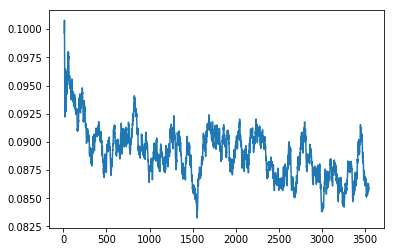

In [39]:
learn.sched.plot_loss()

In [ ]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)
Audio(url="CHORD.WAV", autoplay=True)

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
f2(preds, y)